Unversity of Michigan ROB 101 - Computational Linear Algebra

# Homework 5.  Linear independence, Least Squares and Regression

## See our Canvas Page for the Due Date and Time!

#### Purpose:  Learn to use Julia to determine linear independence and compute regression models
- Skills: 
    - Relate theory of linear independence to numerical algorithms
    - More practice writing functions
    - Fitting lines and curves to data
- Knowledge:
    - Understand regression models
    - Building confidence with complex functions
    
#### Task:
Complete cells in the notebook as instructed.

## Using an LU factorization to determine whether a matrix has independent columns.
<img src = "https://i.postimg.cc/DyKPg9KX/Pro-Tip-Linear-Independence.png" width = 700>

### Example: $$A = \begin{bmatrix} 1&0&2\\2&-2&6\\3&4&2\\1&5&-3\end{bmatrix} $$

In [ ]:
#Example:
using LinearAlgebra
#declaring the A matrix:
A = [1 0 2; 2 -2 6; 3 4 2; 1 5 -3] 
#Using Julia's LU Factorization with Row Permuation
F = lu(A'*A,check=false) # <---check = false avoids Julia doing something we do not need!
L = F.L
U = F.U
P = F.P
@show diag(U) #Show diag(U) in the Output
U

**Remember** if you call LU by ```L,U,P = lu(A)```, P is not the permuation matrix. It contains the vector of indices that defines the permulation matrix

We illustrate this next

In [ ]:
L,U,P = lu(A'*A,check=false)
println("Ooooppppss... To get the permutation matrix, use F=lu(A'*A,check=false) and P=F.P")
P

In [ ]:
# To obtain P you need to call
F=lu(A'*A,check=false)
P=F.P

### Problem 0

Notice that the last entry of diag(U) is very close to zero but not exactly zero. This is often due to roundoff error. Treating U[3,3] as being identically zero, find $$x=\begin{bmatrix}x_1\\x_2\\x_3  \end{bmatrix} \neq 0_{3 \times 1}$$
such that $A x = 0$. 

**Hint:** Consult your Chapter 7.5.4 of the textbook for a problem that is almost identical to Problem 0. The method is not provided here. You can compute x by hand or with Julia. All we are checking is the answer.


In [ ]:
# Given A 
A = [1 0 2; 2 -2 6; 3 4 2; 1 5 -3] 
#Use the LU factorization from above to calculate x
# Place your x-vector here 

# x = ??

display(A*x)  # how to check you answer

In [ ]:
# friendly check
# if the value of is_it_correct_checkN is "Yes", then your answer may be correct. 
# If the value of is_it_correct_checkN is "No", then your answer is wrong

is_it_correct_check1 = (length(x) == 3) ? "Yes" : "No" 
is_it_correct_check2 = isapprox(A*x, zeros(4), atol=1e-4) ? "Yes" : "No"
is_it_correct_check3 = norm(x) > 0.1 ? "Yes" : "No"

@show is_it_correct_check1;  
@show is_it_correct_check2; 
@show is_it_correct_check3; 

In [ ]:
#Example
using Random
Random.seed!(20201002);  #it's a date!
A=randn(50,40); A1=A[:,1:15]; A2=A[:,2:35];A3=randn(50,5)
A=[A1 A2 A3] # building a matrix with dependent columns
#Using Julia's LU Factorization with Row Permuation
F = lu(A'*A,check=false) # check = false stops Julia from worrying about det(A'*A) = 0 or not
diag(F.U) #Show diag(U) in the Output

Notice that diag(U) is too big to see all of its entries! How can we check whether it has any zero elements? 

In [ ]:
# Run me and use me later
temp=[-6 11 -2 -1e-12 2e-3 pi]
@show minimum(temp) # finds minimum value of the vector temp
@show abs_temp=abs.(temp) 
# note the . following abs. It means to apply the absolute value
# to each entry of temp
@show minimum(abs_temp)

# pay extra attention here
diagU=diag(U) # diagonal of U
min_value=minimum(abs.(diagU)) 

### Problem 1. Build a function that returns *true* if the columns of A are Independent and *false* if they are Dependent
Use the example above to help you.  Remember, in real computations, zero is rarely identically the zero number. You have to set a threshold! How small should zero be? How can you return ``true`` vs ``false`` based on the size of a value? Hint, look through your code in juliahw3. Yes, we do expect you to keep track of what you learn. This is part of making the transition from High School to College. You can also consult the Lab Manual.

In [ ]:
function is_independent(A)
    #Correct the zeros, find alpha(alph), then assess the values to determine if the vectors are independent
    #if the vectors are independent, return true
    #if they are dependent, return false
    #Here, you can assume anything smaller than 1e-4 is zero 
    
    # YOUR CODE HERE
end

In [ ]:
# Before running the friendly check, test your new function yourself
     A = [0 1 0 0;
          0 2 1 0;
          0 3 2 1]
# Due to the column of zeros, the columns of A cannot be independent
is_independent(A)

In [ ]:
# Before running the friendly check, test your new function yourself
     A = [1 1 0 0;
          3 2 1 0;
          6 3 2 1]
# Because A has 3 rows and 4 columns, the columns of A cannot be independent
@show is_independent(A)
# If we remove the first column, then A becomes lower tirangular with no zeros on the diagonal
@show is_independent(A[:,2:4])
A[:,2:4]

In [ ]:
# friendly check
# if the value of is_it_correct_checkN is "Yes", then your answer may be correct. 
# If the value of is_it_correct_checkN is "No", then your answer is wrong

checkA = [0 1 0 0;
          0 0 1 0;
          0 0 0 1]
checkB = [1 0 0;
          0 1 0;
          0 0 1]
is_it_correct_check1 = (!is_independent(checkA)) ? "Yes" : "No" 
is_it_correct_check2 = (is_independent(checkB)) ? "Yes" : "No" 

@show is_it_correct_check1; 
@show is_it_correct_check2; 

In [ ]:
A = [1 0 2; 
     2 -2 6; 
     3 4 2; 
     1 5 -3] 
is_independent(A)

In [ ]:
aInd = [7   2   1   2   9;
        1   1   6   8   2;
        1   10  5   10  7;
        8   6   8   2   3;
        8   4   5   5   10]
is_independent(aInd)

In [ ]:
# Here is the LDLT function from lab 5 

# Run me, don't change me!
#
function ldltROB101(A)
    epsilon = 1e-12
    M = A'*A
    n,m = size(A)
    Areduced = M
    L = Array{Float64,2}(undef,m,0)
    Id = zeros(m,m) + I
    P = Id    
    D=zeros(m,m)
    for i=1:m
        ii=argmax(diag(Areduced[i:m,i:m]))
        mrow=ii[1]+(i-1)
        if !(i==mrow)
            P[[i,mrow],:]=P[[mrow,i],:]
            Areduced[[i,mrow],:]=Areduced[[mrow,i],:]
            Areduced[:,[i,mrow]]=Areduced[:,[mrow,i]]
        end
        if (i>1)
            L[[i,mrow],:] = L[[mrow,i],:]
        end
        pivot=Areduced[i,i]
        if !isapprox(pivot,0,atol=epsilon)
            D[i,i]=pivot
            C=Areduced[:,i]/pivot
            L=[L C]
            Areduced=Areduced-(C*pivot*C')
        else
            L=[L Id[:,i:m]]
            break
        end
    end
    diagD=diag(D)
    return L,P,D,diagD
end


In [ ]:
# Sample call
A = rand(3, 7)
L,P,D,diagD = ldltROB101(A) # I do return the Permutation matrix
display(P)
println("Here is the diagonal of D")
diagD

### Problem 2.  Existence and Uniqueness of Solutions.

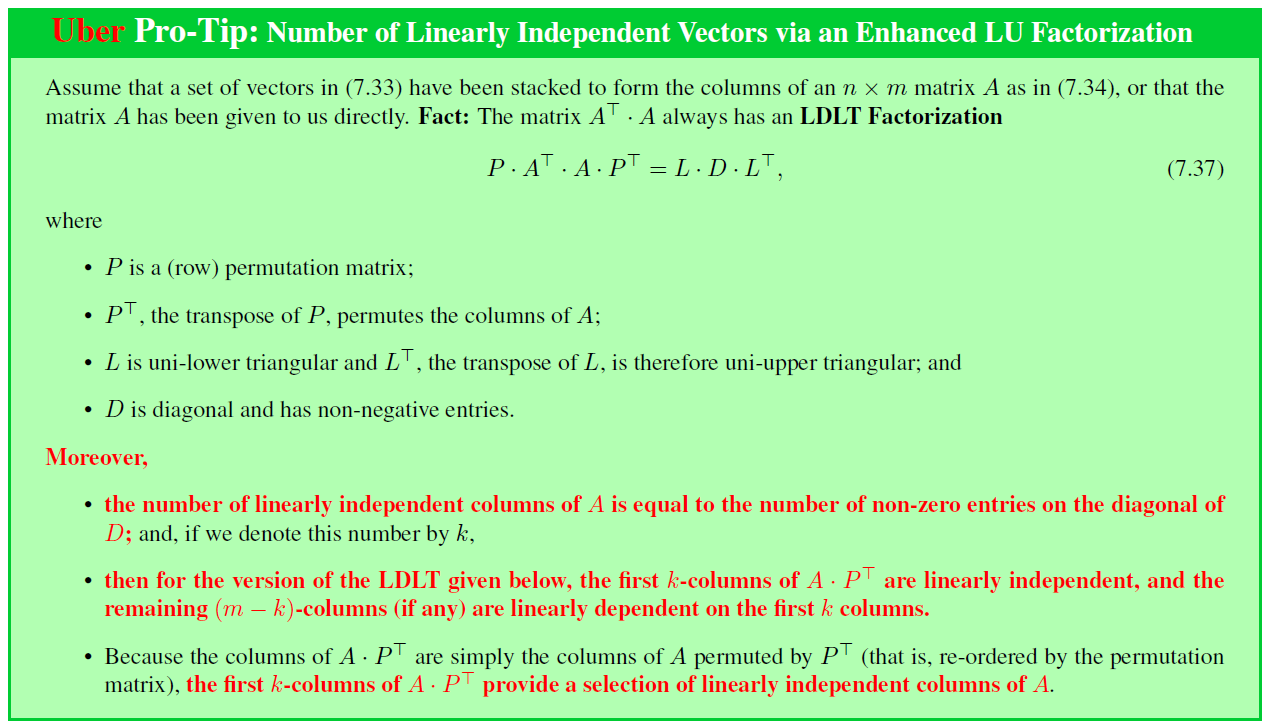

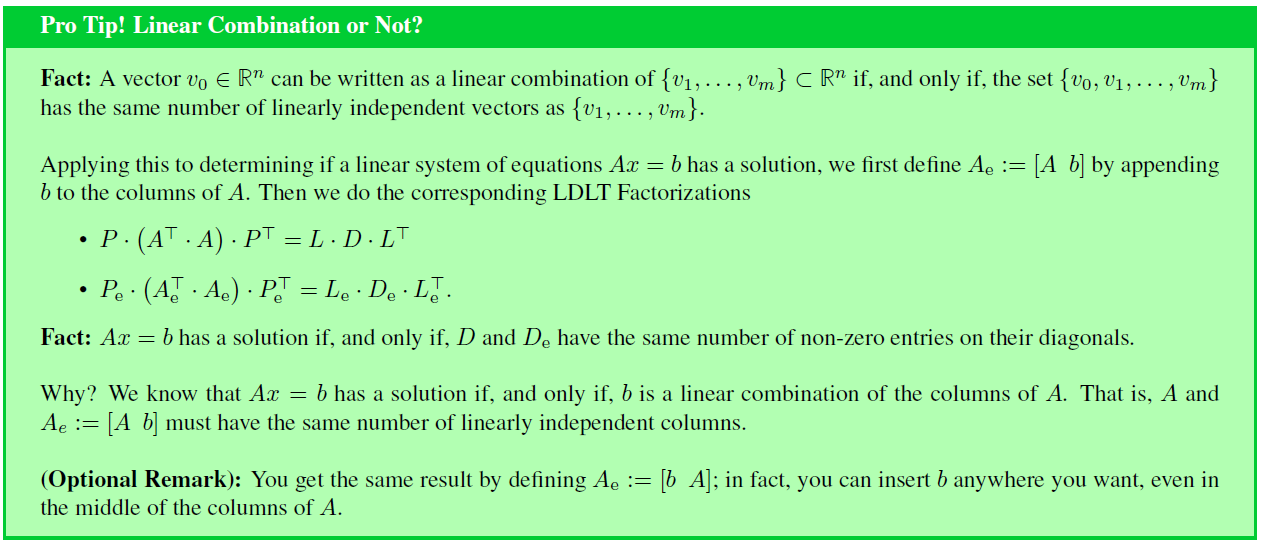


### a) Consider the system of linear equations given below,
$$\begin{equation}
\label{eq:LinearCombinationViaLU}
\underbrace{\left[\begin{array}{rrr}
 1 & -2 &  1 \\
 2 &  0 & 0 \\
 3 &  -3 &  1 \\
 4 &  1 &  0 \\
 5 &  -4 &  1
 \end{array}\right]}_{A} \underbrace{\left[\begin{array}{c}
x_1\\ x_2\\x_3 \end{array}\right]}_{x} =  \underbrace{\left[\begin{array}{r}
9\\ 4\\ 16 \\5 \\ 23 \end{array}\right]}_{b}.
\end{equation}$$
### Based on the method described above, perform the relevant LDLT Factorizations associated with the matrices $A$ and $[A ~~b]$, respectively. 

## Store the diagonals of D and De in  ``diagD`` and ``diagDe``. 

# Warning: The autograder is looking for their diagonals and not $D$ or $D_e$! 


In [ ]:
# a) part 1
A = [1 -2 1; 2 0 0; 3 -3 1; 4 1 0; 5 -4 1]
b = [9; 4; 16; 5; 23]
# Use the function ``ldltROB101'' to perform LDLT Factorizations associated with the matrices 
# A and [A b] respectively. Store the diagonals of the factorizations in variables called:
#              diagD and diagDe

# YOUR CODE HERE

### b) Based on your analysis of the diagonals, state whether  $Ax = b$ has a solution, or if it cannot be determined by only looking at the diagonals. 
### Provide your answer by uncommenting one of the following lines.

To "uncomment" a line, just delete the # character in the front of the line.  This will change that line from a comment to actual, executable code.

In [ ]:
# DO NOT CHANGE the variable name or you will fail the autograder, which is looking at Ans1
# Ans1 = false # means it does NOT have a solution
# Ans1 = true  # means it DOES have a solution
# Ans1 = "Cannot be determined based on diagD and diagDe"

### Problem 3.  The Norm of a Vector
<img src = "https://i.postimg.cc/ZnngJ7zk/normDef.jpg" width = 700>

### a)  Calculate the Norm of vector v1 $$v1 = \begin{bmatrix}-1\\4\\7\\3\\6\\2\end{bmatrix}$$

Hint:  Use the definition above, taken from Chapter 8 of the ROB 101 textbook.

In [ ]:
#vector v1 is declared for you
v1 = [-1; 4; 7; 3; 6; 2]
#store the norm into a variable called normv1

# normv1 = ??


### b.  Given a vector of an unknown length, write a function that calculates the norm of the vector


In [ ]:
#Fill in the necessary elements of the function
function my_norm(v)
    #initializing a sum variable to be zero
    sumSquares = 0
    #write a For loop that adds up the squares of all the elements of v
    # YOUR CODE HERE
    #Now take the root of the sum of all the squares, and return the value from the function
    # YOUR CODE HERE
end

In [ ]:
#check that your function returns the same value as you got earlier for normv1
my_norm(v1) == normv1

**The secret:  Julia has a Built-in Norm function in the linear algebra package, called norm().  You can use it the exact same way as your my-norm() function.**

Note:  You still must complete the function my_norm() as indicated to receive points.  This is not because we want you to do unnecessary busy work, it is because we think it is important that you understand what Julia is doing behind the scenes when you use an included function.

### Problem 4. Least Squares Solutions to linear equations
<img src = "https://i.postimg.cc/7hMvLBKm/LSQ.jpg" width = 700>

### a)  Find a least squares solution to $Ax = b$, given
$$\begin{equation}
\label{eq:LeastSquareSolExample}
\underbrace{\left[\begin{array}{rrr}
 1.0 & 1.0 \\
 2.0 & 1.0 \\
 4.0 & 1.0 \\
 5.0 & 1.0 \\
 7.0  & 1.0
 \end{array}\right]}_{A} \underbrace{\left[\begin{array}{c}
x_1 \\ x_2  \end{array}\right]}_{x} =  \underbrace{\left[\begin{array}{r}
4 \\  8 \\ 10 \\ 12 \\ 18 \end{array}\right]}_{b},
\end{equation}$$
A reminder about LU with permutations for solving $Ax = b$:
<img src= "https://i.postimg.cc/D0NFCzXc/LU-P.jpg" width = 700>

#### A reminder about calling the LU function in Julia

F = lu(A); L = F.L; U = F.U; P = F.P

In [ ]:
#Declare A and b
# A = ??
# b = ??

In [ ]:
# You should double check that you have entered A and b correctly
#
# Hint 1: the sum of all the elements of A = 24
# Hint 2: the sum of all the elements of b = 52


In [ ]:
#Compute A' * A and store in a variable aTransA
# aTransA = ??

In [ ]:
#Compute A' * b and store in a variable aTransB
# aTransB = ??

In [ ]:
# Run me, don't change me. I am providing some nice functions for you.
##Forward and Back substitution functions from HW04

#This is a back substitution function.  It solves for x in an equation Ux = b, where U is upper triangular.
# The function assumes the diagonal elements are non-zero. You can change that if you wish!
function backwardsub(U, b)
    n = length(b)
    x = Vector{Float64}(undef, n) 
    x[n] = b[n]/U[n,n]
    for i in n-1:-1:1
        x[i]=(b[i]- (U[i,(i+1):n])' *x[(i+1):n] )./U[i,i]
    end
    return x
end
#This is a forward substitution function. It solves for x in an equation Lx = b, where L is lower triangular.
# The function assumes the diagonal elements are non-zero. You can change that if you wish!
function forwardsub(L, b)
    n = length(b)
    x = Vector{Float64}(undef, n); 
    x[1] = b[1]/L[1,1] 
    for i = 2:n 
        x[i]=(b[i]- (L[i,1:i-1])' *x[1:i-1] )./L[i,i] 
    end
    return x
end

In [ ]:
# Compute x by solving    aTransA * x = aTransB <==> A'*A * x = A'*b
# store x in a variable called xStar

# Use an LU factorization with permutations, and the forwardsub() 
# and backwardsub() functions provided

# YOUR CODE HERE

#Hint:  Make sure you are solving A' * A x = A' b and make sure your answer 
# is stored in xStar

In [ ]:
# friendly check
# if the value of is_it_correct_checkN is "Yes", then your answer may be correct. 
# If the value of is_it_correct_checkN is "No", then your answer is wrong 

is_it_correct_check1 = isapprox(A*xStar, [4.456140350877195, 6.578947368421055, 10.824561403508774, 12.947368421052634, 17.19298245614035], atol=1e-4) ? "Yes" : "No"  

@show is_it_correct_check1;  

### b.  Compute the error and determine if we found an exact solution
Remember, e* = Ax* - b

In [ ]:
#Compute e* 
# eStar = ??

In [ ]:
#Compute ||e*|| 
# normE = ??

In [ ]:
#Compute ||e*||^2 
# normEsquared = ??

### c.  T or F: Does this system have an exact solution? 

#### Provide your answer by uncommenting one of the following lines.
To "uncomment" a line, just delete the # character in the front of the line. This will change that line from a comment to actual, executable code.

In [ ]:
# DO NOT CHANGE the variable name or you will fail the autograder, which is looking at Ans2
# Ans2 = false
# Ans2 = true
# Ans2 = "Cannot be determined based on ||e*||^2"

### Problem 5.  Fitting a Line with Least Squares
Recall that a linear regression can be written as the linear equations:
$$y_i = m x_i +b = \begin{bmatrix} x_i & 1 \end{bmatrix} \begin{bmatrix} m \\ b \end{bmatrix},  ~~1 \le i \le N,$$ 
Where N is the number of data points.

In Matrix Form:
$$\begin{equation}
    \label{eq:FirstRegressionModel02}
\underbrace{\begin{bmatrix} y_1 \\ y_2 \\ \vdots \\y_N \end{bmatrix}}_{Y} = \underbrace{\left[\begin{array}{cc}
    x_1 & 1 \\
    x_2  & 1 \\
    \vdots & 1 \\
    x_N & 1
\end{array}  \right]}_{\Phi} \cdot  \underbrace{\begin{bmatrix} m \\ b \end{bmatrix}}_{\alpha},
\end{equation}$$
Where $Y$ is the vector of $y$-data, $\Phi$ is called the regressor matrix and $\alpha$ is the vector of unknown coefficients that parameterize the  model.

In [ ]:
#This cell generates the data
using Random
Random.seed!(1234)
noise = randn(300, 1)
xvals = collect(0:.1:29.9)
yvals = 1/2*xvals + noise
using Plots
println("Patience: It takes a while to print this many points")
scatter(xvals, yvals)

### a)  Create the measurement vector Y and regressor matrix $\Phi$  for the data.
Look back at the Problem 5 Cell for help identifying which data goes in the regressor matrix and which in the measurement vector.

In [ ]:
#Declare Y and Phi below
# Y = ??
# Phi = ??

In [ ]:
# friendly check
if size(Phi, 2) != 2
    println("Wrong dimensions. Phi should have two columns")
elseif size(Phi, 1) != length(xvals)
    println("Wrong dimensions. Phi should N rows, where N = length(xvals)")
else
    println("Your regressor matrix Phi has the correct number of rows and columns!")
end

### b) Find the least squares solution to $Y =  \Phi  \alpha $  
Hint:  Follow the steps you followed in Problem 4 to use the LU factorization, except we have $\Phi$ instead of $A$, $\alpha$ instead of $x$, and $Y$ instead of $b$


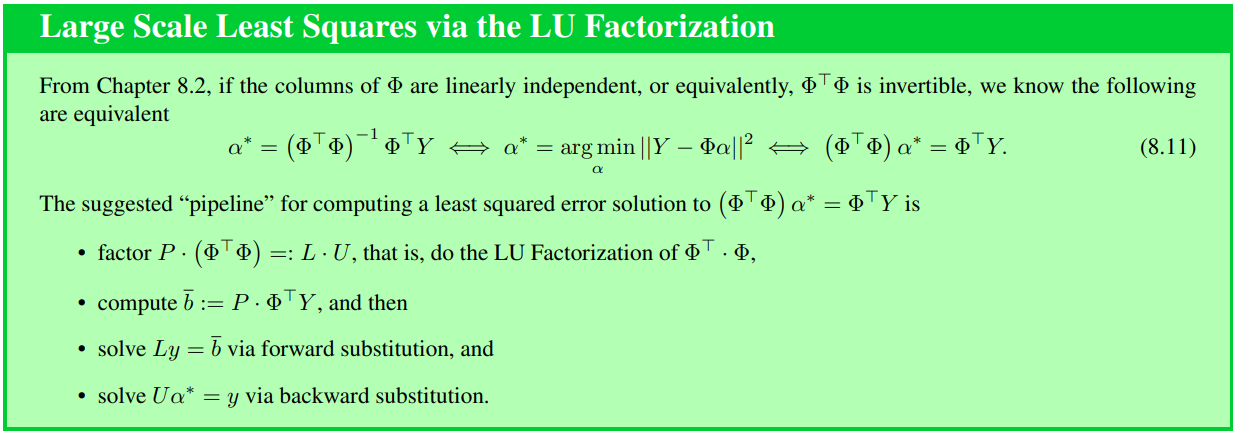

In [ ]:
#compute alpha* and return it in a variable called alphaStar

# YOUR CODE HERE

In [ ]:
# friendly check
if (length(alphaStar) != 2)
    println("Wrong dimensions. alphaStar should be a Vector of length 2")
else
    println("alphaStar has the right length!")
end

### c)  Plot the least squares solution on the same plot as the scatter.  
Reminder: $\alpha = \begin{bmatrix} m \\ b \end{bmatrix}$ and $Y = mx + b$

In [ ]:
# Your task is to plot your regression solution on the same plot showing the data.  

# Define the slope, m, and y-axis intercept, b, for the regressed line y = mx + b 
# m = ??
# b = ??

# We'll do the rest of the work for you

x = collect(0:.1:29.9)
y = m*x + b*ones(length(x), 1)
plot!(x, y, linewidth=3, lc=:red, legend=false) 

## If you see a red line going more or less down the middle of the blob of points, then you've nailed it! The line represents your ```model``` of the data, which in this case, is a simple linear relationship. We'll explore more complicated models shortly.

### d)  Compute the total squared error
$$E_{tot} = \sum_{i=1}^{5} (e_i)^2 = e^\top e = ||e||^2= ||Y-\Phi \alpha ||^2.$$
Use this equation to give an objective measure of how accurate your linear fit was.

In [ ]:
#Use whatever method you would like, but store the value in the variable totSquareError

# totSquareError = ??

### Problem 6.  Quadratic Fitting
You can also fit a regression to a nonlinear set of data.  It can still be a "linear regression" even if the data itself does not present a linear pattern. The key is that the unknpwn parameters in the model appear linearly. We illustrate this next.

Writing out the quadratic regression equation $y_i = c_0 + c_1 x_i + c_2 x_i^2$ $,i=1,\cdots,N$ in matrix form yields

$$\underbrace{\left[ \begin{array}{c} y_1 \\ y_2 \\ \vdots \\ y_N \end{array} \right]}_{Y} =
 \underbrace{\left[ \begin{array}{ccc} 1 & x_1 & (x_1)^2 \\ 1 & x_2 & (x_2)^2 \\ \vdots & \vdots \\ 1 & x_N & (x_N)^2 \end{array} \right]}_{\Phi}
 \underbrace{\left[ \begin{array}{c} c_0 \\ c_1 \\ c_2 \end{array} \right] }_{\alpha},
$$

In [ ]:
#This cell generates the data
using Distributions
using Plots
f(x) = 3*x+2*x.^2 
N=300
x=rand(Uniform(-2,2),300,1)
x=sort(x,dims = 1)
# Use x to build the regrssor matrix, Phi
noise=rand(Uniform(-0.5,0.5),300,1)
ydata=f(x) + noise
# use ydata to define the measurement vector Y
scatter(x,ydata)

### a)  Create the vector of measurements $Y$ and the regressor matrix $\Phi$  

In [ ]:
#Declare your matrices below
# Phi = ??
# Y = ??

In [ ]:
# friendly check
if size(Phi, 2) != 3
    println("Wrong dimensions. Phi should be an Nx3 matrix")
else
    println("Phi has the right number of columns!")
end

### b) Find the least squares solution to $Y =  \Phi  \alpha $ 

In [ ]:
#compute alpha* and return it in a variable called alphaStar

# YOUR CODE HERE

In [ ]:
# friendly check
if (length(alphaStar) != 3)
    println("Wrong dimensions. alphaStar should be a Vector of length 3")
else
    println("alphaStar has the right length!")
end

### c)  Plot the least squares regression on the same plot as the scatter
Remember: $ \alpha = \left[ \begin{array}{c} c_0 \\ c_1 \\ c_2 \end{array} \right]$, and the fit is $y_i = c_0 + c_1 x_i + c_2 x_i^2$

In [ ]:
#Declare y_fit and plot it on the same graph with plot!()
#
# Check out the code we used when regressing a line

# YOUR CODE HERE

yfit = c0*ones(length(x), 1) + c1*x + c2*x.^2
plot!(x, yfit, linewidth=3, lc=:red, legend=false)

## If you see a red line going more or less down the middle of the blob of points, then you've nailed it!

### d)  Compute the total squared error

In [ ]:
#Use whatever method you would like, but store the value in the variable totSquareError
# totSquareError = ??

### Problem 7.  Multi-Term Regression.
Basically, any dataset can have a regression of any degree fit to it.  Some fits will be better than others. One way to find out which degree is the ``best'' is to test out a bunch of different fits.  For a problem with a degree higher than a quadratic, it is more efficient to automate the process.  

### a) Write a function to handle a regression fit of any desired degree of polynomial, where degree is the highest power in the polynomial. 

Your function should:
* take in a vector of x data, a vector of y data, and the degree of the function
* declare $\Phi$ and $Y$
* Solve for $\alpha$
* declare the fitted function 
* plot the fitted function on top of the scatter plot
* return the total squared error
* for this problem, your function should not return anything else, not even the coefficients

**Hint:**  Make use of ```for loops``` within the function!  

In [ ]:
function multi_term_regression(xdata, ydata, degree)
    #fill in the rest of the function.  Look back at problem 6 for help.
    if length(xdata) != length(ydata)
        println("Your data is messed up. You must have run some cells out of order.")
        return totSquareError = -100 # an impossible value for a squared error
    end
    
    # YOUR CODE HERE
    
    
    # We'll plot your fit for you
    xMin = minimum(xdata) -1
    xMax = maximum(xdata) +1
    x = collect(xMin:0.1:xMax)
    yfit =zeros(length(x),1)
    for i = 1:length(alphaStar)
        yfit = yfit + alphaStar[i]*x.^(i-1)
    end
    plot!(x, yfit)
    # End of plotting
    return totSquareError
    
end

In [ ]:
# friendly check
# if the value of is_it_correct_checkN is "Yes", then your answer may be correct. 
# If the value of is_it_correct_checkN is "No", then your answer is wrong 
x = collect(-4*pi:0.1:4*pi)
y = sin.(x)
@show totSquareError14 = multi_term_regression(x, y, 14) # Why 14? Why not!
is_it_correct_check1 = isapprox(totSquareError14,1.214, atol=1e-2) ? "Yes" : "No"  

@show is_it_correct_check1; 

In [ ]:
using Random
using Distributions
using LinearAlgebra
using Plots
#defining a strange function
g(xdata) = 0.03*(xdata.^4).*sin.(xdata) + 0.02xdata.^2 - 0.05xdata.^3 + 0.0007xdata.^5 - 0.0008xdata.^6
#getting the data ready
sdata = rand(Uniform(-4, 4), 300, 1)
xdata = sort(sdata, dims = 1)
noise = rand(Uniform(-1, 1), 300, 1)
ydata = g(xdata) + noise
scatter(xdata, ydata)

In [ ]:
p3=scatter(xdata, ydata)
degree1 = multi_term_regression(xdata, ydata, 1)
degree2 = multi_term_regression(xdata, ydata, 2)
degree3 = multi_term_regression(xdata, ydata, 3)
degree4 = multi_term_regression(xdata, ydata, 4)
degree5 = multi_term_regression(xdata, ydata, 5)
degree6 = multi_term_regression(xdata, ydata, 6)
degree7 = multi_term_regression(xdata, ydata, 7)
degree8 = multi_term_regression(xdata, ydata, 8)
xlims!(-6, 6)
ylims!(-15, 8)
display(p3)
tenTerm = multi_term_regression(xdata, ydata, 10)
errVect = [degree1, degree2, degree3, degree4, degree5, degree6, degree7, degree8]

### b)  Use the total squared error values to determine the degree of polynomial which gives a ``good`` fit and for which, when you go beyond that, any gain is marginal in the sense that it reduces the error by less than 1%.



In [ ]:
# find the degree of polynomial which fits the data well, and when you go beyond that degree, 
# the totSquareError is reduced by one percent or less. 

# store the degree of the ``best fitting polynomial'' as bestDegree
# 
#
# bestDegree = ??   # should be an integer between one and eight

In [ ]:
# Run me to see the fit you chose as the best one
p4=scatter(xdata, ydata)
xlims!(-5, 5)
ylims!(-15, 8)
@show bestDegree = multi_term_regression(xdata, ydata, bestDegree)
display(p4)

In [ ]:
# Run me to see that more terms might NOT always be better. 
# While I do lower the fitting error, the manner in which I 
# extrapolate the data does not seem believable
# for negative vlaues. This is called over fitting.
#
p5=scatter(xdata, ydata)
xlims!(-5, 5)
ylims!(-15, 8)
@show degree14 = multi_term_regression(xdata, ydata, 14)
display(p5)